# Gráficos

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt

In [29]:
sns.set_style("darkgrid")

experimento_1 = pd.read_csv("results/archivos/uniforme.csv")
experimento_2 = pd.read_csv("results/archivos/normalsigma3.csv")

variandoSigma = pd.read_csv("results/archivos/sigma.csv")


sigma0125 = pd.read_csv("results/archivos/sigma0.125variandocantPalabras.csv")
sigma025 = pd.read_csv("results/archivos/sigma0.25variandocantPalabras.csv")
sigma05 = pd.read_csv("results/archivos/sigma0.5variandocantPalabras.csv")
sigma1 = pd.read_csv("results/archivos/sigma1variandocantPalabras.csv")
#sigma2 = pd.read_csv("results/archivos/sigma2variandocantPalabras.csv")
sigma3 = pd.read_csv("results/archivos/sigma3variandocantPalabras.csv")
#sigma4 = pd.read_csv("results/archivos/sigma4variandocantPalabras.csv")
sigma8 = pd.read_csv("results/archivos/sigma8variandocantPalabras.csv")



Queremos ver como afecta en incremento de unidades de ejecución en la division de la carga de archivos y en su tiempo de ejecución. Para ello contamos con 2 instancias.
La primera esta compuesta por 250 archivos con 100 palabras de longitud fija generadas de manera uniforme, la segunda estara compuesta por 250 archivos con 100 palabras de longitud fija generadas con una distribución normal centrada en MH y con desvio standar 3. 

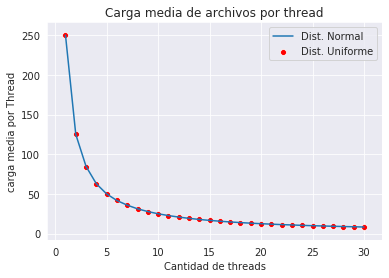

In [30]:
data = experimento_1.copy()
data2 = experimento_2.copy()


fig = sns.lineplot(data=data, x = 'cantThreads', y='medLoad'  )
fig = sns.scatterplot(data=data2, x = 'cantThreads', y='medLoad', color = 'red')



plt.legend(["Dist. Normal", "Dist. Uniforme"])

plt.xlabel("Cantidad de threads")
plt.ylabel("carga media por Thread")
plt.title("Carga media de archivos por thread")
plt.savefig("results/archivos/comparacionCargaMedia.svg")
plt.show()



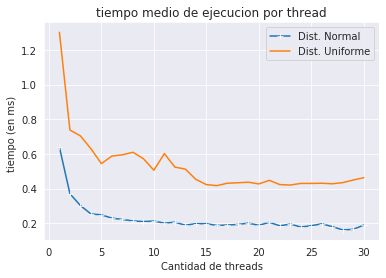

In [31]:
data = experimento_1.copy()
data2 = experimento_2.copy()


#data = data.groupby("cantThreads")
#data2 = data2.groupby("cantThreads")

fig = sns.lineplot(data=data, x = 'cantThreads', y='tiempoMedio', marker="+")#uniforme
fig = sns.lineplot(data=data2, x = 'cantThreads', y='tiempoMedio')#muchos archivos con pocas palabras



#plt.xlim( [ 1, 30 ] )
plt.legend(["Dist. Normal", "Dist. Uniforme"])
plt.xlabel("Cantidad de threads")
plt.ylabel("tiempo (en ms) ")
plt.title("tiempo medio de ejecucion por thread")
plt.savefig("results/archivos/comparacionTiempoMedio.svg")
plt.show()
#En este experimento el tiempo medio para data2( muchos archivos con pocas palabras y pocos con muchas ) ya que los de pocoas palabras
#se ejecutan rapido. Un archivo al tener 154k palabras es de suponerse que este mas tiempo en ejecución

Variando distribución de las palabras
La funcion incrementar debe garantizar que 2 claves que colisionen no modifiquen su valor en el HashMap de forma concurrente. Esto lo logramos 
con semaforos que solo permiten a 1 solo thread actualizar dicho valor. El objetivo de este experimento es mostrar que pasa con el tiempo medio 
de ejecución cuando hay muchas claves que colisionan. Para ello utilizamos varios archivos que contienen palabras generadas de forma aleatoria 
mediante una variable Normal con media entre las letras M y N y con un desvio standar variable.
Como podemos ver en el grafico encontramos que el mayor tiempo medio de ejecución se encuenra con valores de sigma entre 0.5 y 0.75. 
Si recordamos como se presentan los datos en una distribución normal, al ser mas chico el sigma se genera una mayor concentración
de datos cerca de la media. Esto provoca que las listas asignadas a esas letras esten constantemente bloquadas a otros threads que quieran actualizar
una clave en ellas ya sea realizando una busqueda o agregando un nuevo nodo a la lista atomica. 
Notamos que para valores inferiores a los observados observados el tiempo medido es menor. Suponemos que al acumularse mas palabras que inician 
con la misma letra y al estar limitada la longitud de las mismas estas comienzan a repetirse con mayor frecuencia logrando que la lista correspondiente
a las letras asignadas sean lo suficientemente cortas para que el incremento se realice rapido. Por otro lado, al incrementar el valor de sigma el tiempo 
medio de ejecución por thread tambien decrece. Al igual que en el caso anterior, al estar la longitud de las palabras fijas suponemos que la distribución de palabras
tienden a comportarse como una distribución uniforme generando listas de palabras de longitud similar en todas las letras. 

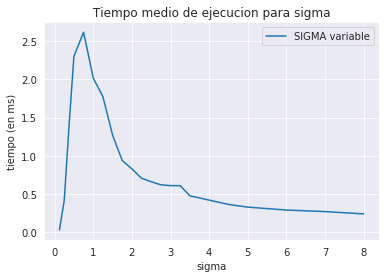

In [32]:
data = variandoSigma.copy()

fig = sns.lineplot( data = data, x = 'sigma', y = 'tiempoMedio' )

plt.legend(["SIGMA variable"])
plt.xlabel("sigma")
plt.ylabel("tiempo (en ms)")
plt.title(" Tiempo medio de ejecucion para sigma ")
plt.savefig("results/archivos/variandoSigma.svg")
plt.show()


Variamos la cantidad de palabras por archivo para un sigma determinado obtenemos el tiempo de ejecución maximo, con sigma = 0.5

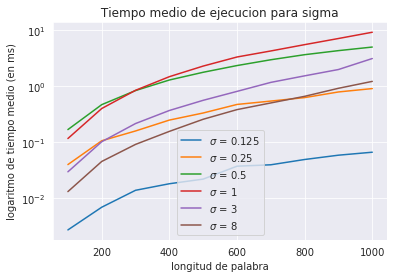

In [33]:
data1 = sigma0125.copy()
data2 = sigma025.copy()
data3 = sigma05.copy()
data4 = sigma1.copy()
#data5 = sigma2.copy()
data6 = sigma3.copy()
#data7 = sigma4.copy()
data8 = sigma8.copy()

fig = sns.lineplot( data = data1, x = 'cantPalabras', y = 'tiempoMedio', ci = None )
fig = sns.lineplot( data = data2, x = 'cantPalabras', y = 'tiempoMedio', ci = None )
fig = sns.lineplot( data = data3, x = 'cantPalabras', y = 'tiempoMedio', ci = None )
fig = sns.lineplot( data = data4, x = 'cantPalabras', y = 'tiempoMedio', ci = None )
#fig = sns.lineplot( data = data5, x = 'cantPalabras', y = 'tiempoMedio', ci = None )
fig = sns.lineplot( data = data6, x = 'cantPalabras', y = 'tiempoMedio', ci = None )
#fig = sns.lineplot( data = data7, x = 'cantPalabras', y = 'tiempoMedio', ci = None )
fig = sns.lineplot( data = data8, x = 'cantPalabras', y = 'tiempoMedio', ci = None )

plt.yscale("log") 

plt.legend(["$\sigma$ = 0.125", "$\sigma$ = 0.25", "$\sigma$ = 0.5", "$\sigma$ = 1", "$\sigma$ = 3", "$\sigma$ = 8" ])

plt.xlabel("longitud de palabra")
plt.ylabel("logaritmo de tiempo medio (en ms)")
plt.title(" Tiempo medio de ejecucion para sigma ")
plt.savefig("results/archivos/variandoSigmaYpalabrasPorArchivos.svg")
plt.show()

